Data point 1: Latitude=49.376872847192, Longitude=-17.755502218567, Timestamp=2024-07-01 11:23:15
Data point 2: Latitude=49.594275796265, Longitude=-16.760676695, Timestamp=2024-07-01 11:23:26
Data point 3: Latitude=49.802239476374, Longitude=-15.756800304467, Timestamp=2024-07-01 11:23:37
Data point 4: Latitude=50.000616395952, Longitude=-14.744133257478, Timestamp=2024-07-01 11:23:48
Data point 5: Latitude=50.189260133841, Longitude=-13.722973550068, Timestamp=2024-07-01 11:23:58
Data point 6: Latitude=50.368030956686, Longitude=-12.693631065352, Timestamp=2024-07-01 11:24:10
Data point 7: Latitude=50.551635080801, Longitude=-11.561771965873, Timestamp=2024-07-01 11:24:21
Data point 8: Latitude=50.709331460243, Longitude=-10.516429556148, Timestamp=2024-07-01 11:24:32
Data point 9: Latitude=50.869641773331, Longitude=-9.3680099642274, Timestamp=2024-07-01 11:24:45
Data point 10: Latitude=51.005722659763, Longitude=-8.3083445791024, Timestamp=2024-07-01 11:24:56
Data point 11: Latitud

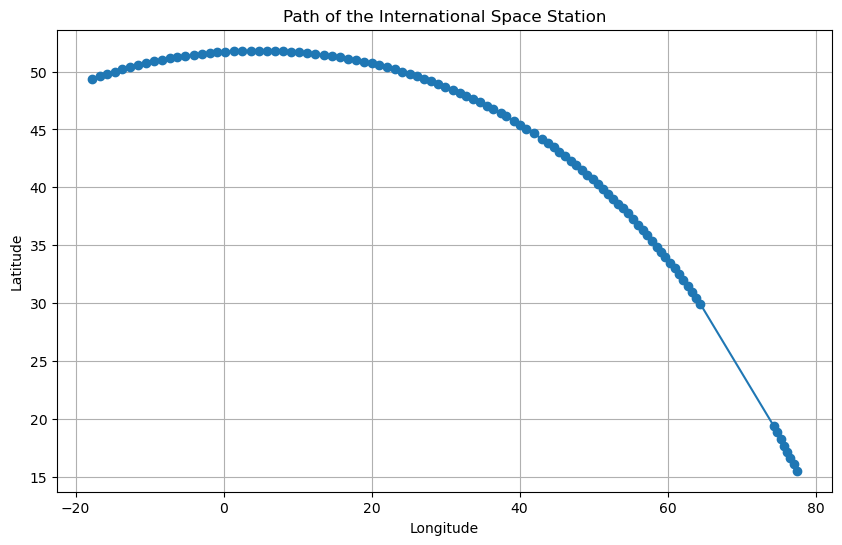

In [1]:
import requests
import time
import datetime
import matplotlib.pyplot as plt

# API endpoint
url = "https://api.wheretheiss.at/v1/satellites/25544"

# Initialize lists to store latitude, longitude, and timestamp
latitudes = []
longitudes = []
timestamps = []

# Generate 100 data points
for i in range(100):
    try:
        # Send a GET request to the API
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes

        # Parse the JSON response
        data = response.json()

        # Extract latitude and longitude
        latitude = data["latitude"]
        longitude = data["longitude"]

        # Get the current timestamp
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        # Append the data to the respective lists
        latitudes.append(latitude)
        longitudes.append(longitude)
        timestamps.append(timestamp)

        print(f"Data point {i+1}: Latitude={latitude}, Longitude={longitude}, Timestamp={timestamp}")
    
    except requests.exceptions.RequestException as e:
        print(f"Failed to retrieve ISS location: {e}")

    # Wait for 10 seconds before the next request
    time.sleep(10)

# Ensure plots are shown inline in Jupyter Notebook
%matplotlib inline

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ISS path
ax.plot(longitudes, latitudes, marker='o', linestyle='-')

# Set labels and title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Path of the International Space Station")
ax.grid(True)

# Show the plot
plt.show()